# About the Data:

Data Source : https://www.kaggle.com/hugomathien/soccer

This database from kaggle contains the data of

- 25,000 matches.
- +10,000 players.
- 11 European Countries with their lead championship.
- Seasons 2008 to 2016.
- Players and Teams' attributes sourced from EA Sports' FIFA video game series, including the weekly updates.
- Team line up with squad formation (X, Y coordinates).
- Betting odds from up to 10 providers.
- Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches.


This is a fairly large database and we use only certain datasets from it for this project.

# Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime

%matplotlib inline

# Reading the data:

In [2]:
data = sqlite3.connect("D:\database.sqlite")

#Loading the tables from the database
df_country = pd.read_sql('select * from Country',data)
df_league = pd.read_sql('select * from League',data)
df_match = pd.read_sql('select * from Match',data)
df_player = pd.read_sql('select * from Player',data)
df_player_att = pd.read_sql('select * from Player_Attributes',data)
df_team = pd.read_sql('select * from Team',data)
df_team_att = pd.read_sql('select * from Team_Attributes',data)

# Exploring and Cleaning the Match dataset:

In the first part of exploring our data, we analyse the df_match dataset to figure out if the team playing at their home have an advantage over the visiting team. The dataset contains data on eleven different leagues in Europe and for the purpose of this analysis, we consider the data from only the top five leagues in Europe - English Premier League, La Liga, Serie A, Bundesliga and Ligue 1.

In [3]:
df_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df_match.columns.tolist())

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

In [5]:
df_match.isnull()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
25975,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
25976,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
25977,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


**OBSERVATIONS:**

1. There are 115 columns in the dataset. However most of the columns are not relevant for our analysis.

2. We can see there are a lot of NULL values in many of the columns. 

3. We drop the columns with a lot of NULL values and the columns that are not relevant for our analysis.

4. After dropping the said columns, our cleaned dataset will have only the following 10 columns - country_id, league_id, season, stage, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal.

**DROPPING UNNECESSARY COLUMNS AND COLUMNS WITH A LOT OF NULL VALUES:**

In [6]:
df_match = df_match[['country_id', 'league_id', 'season', 'stage', 'match_api_id',
               'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']]
df_match

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,2008/2009,1,492473,9987,9993,1,1
1,1,1,2008/2009,1,492474,10000,9994,0,0
2,1,1,2008/2009,1,492475,9984,8635,0,3
3,1,1,2008/2009,1,492476,9991,9998,5,0
4,1,1,2008/2009,1,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...
25974,24558,24558,2015/2016,9,1992091,10190,10191,1,0
25975,24558,24558,2015/2016,9,1992092,9824,10199,1,2
25976,24558,24558,2015/2016,9,1992093,9956,10179,2,0
25977,24558,24558,2015/2016,9,1992094,7896,10243,0,0


**DATA WRANGLING:**

We split the dataset into five different datasets - one for each of Europe's top five leagues.

In [7]:
df_epl = df_match.loc[df_match['league_id'] == 1729]
df_laliga = df_match.loc[df_match['league_id'] == 21518]
df_seriea = df_match.loc[df_match['league_id'] == 10257]
df_bundesliga = df_match.loc[df_match['league_id'] == 7809]
df_ligue1 = df_match.loc[df_match['league_id'] == 4769]

Now, we examine the new datasets.

In [8]:
df_epl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 1728 to 4767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_id        3040 non-null   int64 
 1   league_id         3040 non-null   int64 
 2   season            3040 non-null   object
 3   stage             3040 non-null   int64 
 4   match_api_id      3040 non-null   int64 
 5   home_team_api_id  3040 non-null   int64 
 6   away_team_api_id  3040 non-null   int64 
 7   home_team_goal    3040 non-null   int64 
 8   away_team_goal    3040 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 237.5+ KB


In [9]:
df_laliga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 21517 to 24556
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_id        3040 non-null   int64 
 1   league_id         3040 non-null   int64 
 2   season            3040 non-null   object
 3   stage             3040 non-null   int64 
 4   match_api_id      3040 non-null   int64 
 5   home_team_api_id  3040 non-null   int64 
 6   away_team_api_id  3040 non-null   int64 
 7   home_team_goal    3040 non-null   int64 
 8   away_team_goal    3040 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 237.5+ KB


In [10]:
df_seriea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3017 entries, 10256 to 13272
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_id        3017 non-null   int64 
 1   league_id         3017 non-null   int64 
 2   season            3017 non-null   object
 3   stage             3017 non-null   int64 
 4   match_api_id      3017 non-null   int64 
 5   home_team_api_id  3017 non-null   int64 
 6   away_team_api_id  3017 non-null   int64 
 7   home_team_goal    3017 non-null   int64 
 8   away_team_goal    3017 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 235.7+ KB


In [11]:
df_bundesliga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2448 entries, 7808 to 10255
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_id        2448 non-null   int64 
 1   league_id         2448 non-null   int64 
 2   season            2448 non-null   object
 3   stage             2448 non-null   int64 
 4   match_api_id      2448 non-null   int64 
 5   home_team_api_id  2448 non-null   int64 
 6   away_team_api_id  2448 non-null   int64 
 7   home_team_goal    2448 non-null   int64 
 8   away_team_goal    2448 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 191.2+ KB


In [12]:
df_ligue1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 4768 to 7807
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_id        3040 non-null   int64 
 1   league_id         3040 non-null   int64 
 2   season            3040 non-null   object
 3   stage             3040 non-null   int64 
 4   match_api_id      3040 non-null   int64 
 5   home_team_api_id  3040 non-null   int64 
 6   away_team_api_id  3040 non-null   int64 
 7   home_team_goal    3040 non-null   int64 
 8   away_team_goal    3040 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 237.5+ KB


**OBSERVATIONS:**

We can see that all five data sets contain only the data from the specific league and there are no NULL values in the dataset.
Furthermore, we can see that all the columns have the correct datatype.

**CALCULATING THE NUMBER OF MATCHES WON BY HOME TEAM:**

We write a function to calculate the number of matches won by the home team and the away team. This function also calculates the number of matches that did not produce a result.

In [13]:
def match_result(r):
    if r.home_team_goal > r.away_team_goal:
        return 'Home'
    elif r.home_team_goal < r.away_team_goal:
        return 'Away'
    elif r.home_team_goal == r.away_team_goal:
        return 'Draw'

We apply this function to the five seperate datasets we created for the five leagues.

In [14]:
df_epl['Result'] = df_epl.apply(match_result, axis=1)

df_laliga['Result'] = df_laliga.apply(match_result, axis=1)

df_seriea['Result'] = df_seriea.apply(match_result, axis=1)

df_bundesliga['Result'] = df_bundesliga.apply(match_result, axis=1)

df_ligue1['Result'] = df_ligue1.apply(match_result, axis=1)

C:\Users\ashwi\AppData\Local\Temp/ipykernel_15016/1076966023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_epl['Result'] = df_epl.apply(match_result, axis=1)
C:\Users\ashwi\AppData\Local\Temp/ipykernel_15016/1076966023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laliga['Result'] = df_laliga.apply(match_result, axis=1)
C:\Users\ashwi\AppData\Local\Temp/ipykernel_15016/1076966023.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

**VISUALIZNG THE RESULTS:**

We plot the result of the function as a pie chart to find out the percentage of matches won by the home team and away team and the percentage of matches where the scores were tied.

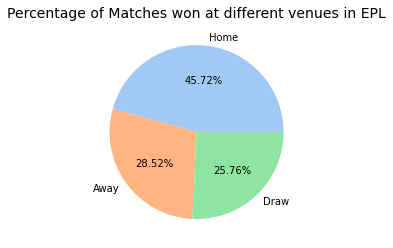

In [15]:
# EPL:

df_epl_plot = df_epl.Result.value_counts(normalize=True).round(4)*100
colors = sns.color_palette('pastel')[0:5]
labels = ['Home', 'Away', 'Draw']

plt.pie(df_epl_plot, labels = labels, colors = colors, autopct="%.2f%%")
plt.title("Percentage of Matches won at different venues in EPL", fontsize=14);

plt.show()

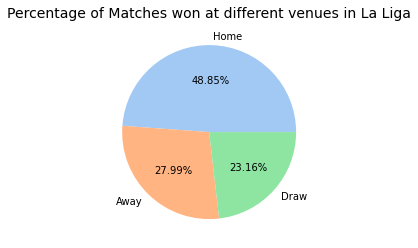

In [16]:
# La Liga:
df_laliga_plot = df_laliga.Result.value_counts(normalize=True).round(4)*100

plt.pie(df_laliga_plot, labels = labels, colors = colors, autopct="%.2f%%")
plt.title("Percentage of Matches won at different venues in La Liga", fontsize=14);

plt.show()

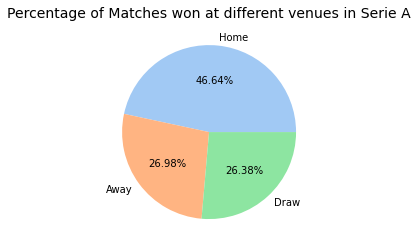

In [17]:
# Serie A:
df_seriea_plot = df_seriea.Result.value_counts(normalize=True).round(4)*100

plt.pie(df_seriea_plot, labels = labels, colors = colors, autopct="%.2f%%")
plt.title("Percentage of Matches won at different venues in Serie A", fontsize=14);

plt.show()

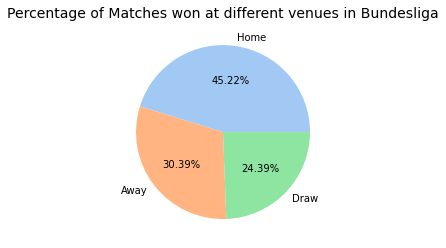

In [18]:
# Bundesliga:
df_bundesliga_plot = df_bundesliga.Result.value_counts(normalize=True).round(4)*100

plt.pie(df_bundesliga_plot, labels = labels, colors = colors, autopct="%.2f%%")
plt.title("Percentage of Matches won at different venues in Bundesliga", fontsize=14);

plt.show()

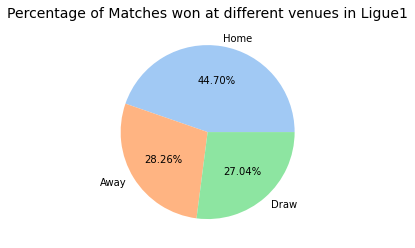

In [19]:
# Ligue 1:
df_ligue1_plot = df_ligue1.Result.value_counts(normalize=True).round(4)*100

plt.pie(df_ligue1_plot, labels = labels, colors = colors, autopct="%.2f%%")
plt.title("Percentage of Matches won at different venues in Ligue1", fontsize=14);

plt.show()

### OBSERVATIONS:

- As we can see from the plots, the home team has a clear advantage at all the five leagues we analysed.
- In the English Premier League, the team playing at home won 45.72% of the matches while the visiting team won 28.52%.
- In the La Liga, the team playing at home won 48.85% of the matches while the visiting team won 27.99%.
- In the Serie A, the team playing at home won 46.64% of the matches while the visiting team won 26.98%.
- In the Bundesliga, the team playing at home won 45.22% of the matches while the visiting team won 30.39%.
- In the Ligue 1, the team playing at home won 44.70% of the matches while the visiting team won 28.26%.


From these observations, we can clearly day that the teams playing at home definetely had an advantage and had a much higher win percentage when compared to the teams playing away.

# Finding the most successful team in England and Spain in 2008/2009 Season:

## Best Team In England(EPL):

First we find out the most successful team in England in the 2008/2009 season. To do this, we slice the df_epl dataframe that we created during the previous analysis to get only the data of 2008/2009 season.

In [20]:
epl_0809 = df_epl.loc[df_epl['season'] == '2008/2009']
epl_0809

,country_id,league_id,season,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Result
1728,1729,1729,2008/2009,1,489042,10260,10261,1,1,Draw
1729,1729,1729,2008/2009,1,489043,9825,8659,1,0,Home
1730,1729,1729,2008/2009,1,489044,8472,8650,0,1,Away
1731,1729,1729,2008/2009,1,489045,8654,8528,2,1,Home
1732,1729,1729,2008/2009,1,489046,10252,8456,4,2,Home
...,...,...,...,...,...,...,...,...,...,...
2103,1729,1729,2008/2009,9,489127,8655,8549,1,1,Draw
2104,1729,1729,2008/2009,9,489128,8659,8667,0,3,Away
2105,1729,1729,2008/2009,9,489129,8462,9879,1,1,Draw
2106,1729,1729,2008/2009,9,489130,8528,10252,0,4,Away


**GENERATING THE TABLE:**

First we need the unique team ids from epl_0809 dataframe to get the id of the 20 teams that played in the English Premier League in the 2008/2009 season and convert them into a dataframe and merge it the df_team dataframe to get the names of the teams corresponding to the particular team id.

In [21]:
team_id = epl_0809.home_team_api_id.unique()
team_id

array([10260,  9825,  8472,  8654, 10252,  8668,  8549,  8559,  8667,
        8455, 10194,  8650, 10261,  9879,  8586,  8659,  8462,  8456,
        8655,  8528], dtype=int64)

In [22]:
epl_0809_table = pd.DataFrame(data = team_id, columns =['team_api_id'])

In [23]:
epl_0809_table = epl_0809_table.merge(df_team[['team_api_id', 'team_long_name', 'team_short_name']])

We create a new column 'Won' to show the number of matches won by each team and initialize it with zeros using np.zeros and display the table generated.

In [24]:
z = np.zeros(20, dtype = int)

epl_0809_table['Won'] = z

In [25]:
epl_0809_table.rename(columns = {'team_api_id':'Team_Id', 'team_long_name':'Team' ,'team_short_name':'Short_Name'}, inplace = True)
epl_0809_table

,Team_Id,Team,Short_Name,Won
0,10260,Manchester United,MUN,0
1,9825,Arsenal,ARS,0
2,8472,Sunderland,SUN,0
3,8654,West Ham United,WHU,0
4,10252,Aston Villa,AVL,0
5,8668,Everton,EVE,0
6,8549,Middlesbrough,MID,0
7,8559,Bolton Wanderers,BOL,0
8,8667,Hull City,HUL,0
9,8455,Chelsea,CHE,0


In [26]:
homewins = np.where((epl_0809['home_team_goal'] > epl_0809['away_team_goal']),
             epl_0809['home_team_api_id'], np.nan)
df_homewins = pd.DataFrame(homewins)
df_homewins = df_homewins.dropna()
df_homewins.rename(columns = {0:'Team_Id'}, inplace = True)

df_homewins['Team_Id'] = df_homewins['Team_Id'].astype(int)
win_home = df_homewins.value_counts()

In [27]:
awaywins = np.where((epl_0809['home_team_goal'] < epl_0809['away_team_goal']),
             epl_0809['away_team_api_id'], np.nan)
df_awaywins = pd.DataFrame(awaywins)
df_awaywins = df_awaywins.dropna()
df_awaywins.rename(columns = {0:'Team_Id'}, inplace = True)

df_awaywins['Team_Id'] = df_awaywins['Team_Id'].astype(int)
win_away = df_awaywins.value_counts()

In [28]:
wins = win_home + win_away
df_wins = pd.DataFrame(wins)
df_wins.rename(columns = {0:'Won'}, inplace = True)
df_wins

,Won
Team_Id,
8455,25
8456,15
8462,10
8472,9
8528,12
8549,7
8559,11
8586,14
8650,25


In [29]:
df_wins = df_wins.reset_index()
df_wins

,Team_Id,Won
0,8455,25
1,8456,15
2,8462,10
3,8472,9
4,8528,12
5,8549,7
6,8559,11
7,8586,14
8,8650,25
9,8654,14


In [30]:
df_wins.dtypes

Team_Id    int64
Won        int64
dtype: object

In [31]:
epl_0809_table.dtypes

Team_Id        int64
Team          object
Short_Name    object
Won            int32
dtype: object

In [32]:
epl_0809_table['Won'] = epl_0809_table['Won'] + df_wins['Won']
epl_0809_table = epl_0809_table.sort_values('Won')
epl_0809_table

,Team_Id,Team,Short_Name,Won
19,8528,Wigan Athletic,WIG,7
5,8668,Everton,EVE,7
12,10261,Newcastle United,NEW,8
11,8650,Liverpool,LIV,8
3,8654,West Ham United,WHU,9
2,8472,Sunderland,SUN,10
10,10194,Stoke City,STK,10
6,8549,Middlesbrough,MID,11
16,8462,Portsmouth,POR,12
4,10252,Aston Villa,AVL,12


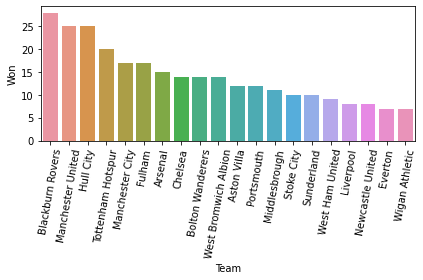

In [33]:
sns.barplot(x = "Team", y="Won", data = epl_0809_table, order=epl_0809_table.sort_values('Won',ascending = False).Team)
plt.xticks(rotation=80)
plt.tight_layout()

## Best Team in Spain(La Liga):

We repeat the same process to find out the best teams in the other leagues.

In [34]:
laliga_0809 = df_laliga.loc[df_laliga['season'] == '2008/2009']

In [35]:
team_id_laliga = laliga_0809.home_team_api_id.unique()

In [36]:
laliga_0809_table = pd.DataFrame(data = team_id_laliga, columns =['team_api_id'])

In [37]:
laliga_0809_table = laliga_0809_table.merge(df_team[['team_api_id', 'team_long_name', 'team_short_name']])

In [38]:
laliga_0809_table['Won'] = z

In [39]:
laliga_0809_table.rename(columns = {'team_api_id':'Team_Id', 'team_long_name':'Team' ,'team_short_name':'Short_Name'}, inplace = True)

In [40]:
laliga_homewins = np.where((laliga_0809['home_team_goal'] > laliga_0809['away_team_goal']),
             laliga_0809['home_team_api_id'], np.nan)
df_laliga_homewins = pd.DataFrame(laliga_homewins)
df_laliga_homewins = df_laliga_homewins.dropna()
df_laliga_homewins.rename(columns = {0:'Team_Id'}, inplace = True)

df_laliga_homewins['Team_Id'] = df_laliga_homewins['Team_Id'].astype(int)
laliga_win_home = df_laliga_homewins.value_counts()

In [41]:
laliga_awaywins = np.where((laliga_0809['home_team_goal'] < laliga_0809['away_team_goal']),
             laliga_0809['away_team_api_id'], np.nan)
df_laliga_awaywins = pd.DataFrame(laliga_awaywins)
df_laliga_awaywins = df_laliga_awaywins.dropna()
df_laliga_awaywins.rename(columns = {0:'Team_Id'}, inplace = True)

df_laliga_awaywins['Team_Id'] = df_laliga_awaywins['Team_Id'].astype(int)
laliga_win_away = df_laliga_awaywins.value_counts()

In [42]:
laliga_wins = laliga_win_home + laliga_win_home
df_laliga_wins = pd.DataFrame(laliga_wins)
df_laliga_wins.rename(columns = {0:'Won'}, inplace = True)

In [43]:
df_laliga_wins = df_laliga_wins.reset_index()

In [44]:
laliga_0809_table['Won'] = laliga_0809_table['Won'] + df_laliga_wins['Won']
laliga_0809_table = laliga_0809_table.sort_values('Won')
laliga_0809_table

,Team_Id,Team,Short_Name,Won
19,8479,RC Recreativo,HUE,8
18,10281,Real Valladolid,VAL,8
17,9864,Málaga CF,MAL,10
16,9865,UD Almería,ALM,14
15,8661,RCD Mallorca,MAL,16
14,8305,Getafe CF,GET,16
13,8634,FC Barcelona,BAR,16
12,8633,Real Madrid CF,REA,16
11,10205,Villarreal CF,VIL,16
10,8302,Sevilla FC,SEV,18


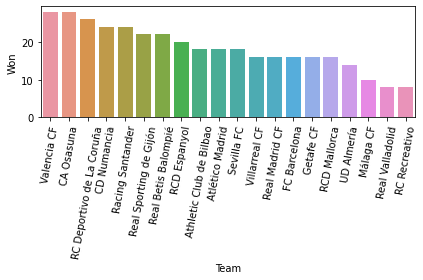

In [45]:
sns.barplot(x = "Team", y="Won", data = laliga_0809_table, order=laliga_0809_table.sort_values('Won',ascending = False).Team)
plt.xticks(rotation=80)
plt.tight_layout()

## OBSERVATIONS:

- According to this dataset, in England Blackburn Rovers won the most number of matches in the 2008/2009 season, while Wigan Athletic won the least number of matches.


- In Spain, Valencia won the most number of matches in the 2008/2009 season, whil RC Recreativo won the least number of matches.

# Multiple Linear Regression:

In this section of the project, we use Multiple Linear Regression to predict the overall rating of attacking players or forwards using other attributes that are relevant to attacking footballers.

- First we create a new dataframe that contains only the data of attacking players. We do this by selecting players whose 'attacking_work_rate' are 'high'.


- We check for NULL values and remove them if necessary.


- Wrangle data where ever necessary to make our dataset more suitable for model building.

In [46]:
df_player_att 

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [47]:
forwards = df_player_att.loc[df_player_att['attacking_work_rate'] == 'high']

In [48]:
forwards

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183892,183893,105454,99031,2009-08-30 00:00:00,75.0,84.0,left,high,low,77.0,...,75.0,74.0,20.0,20.0,12.0,7.0,20.0,66.0,20.0,20.0
183893,183894,105454,99031,2009-02-22 00:00:00,69.0,78.0,left,high,low,66.0,...,75.0,70.0,29.0,20.0,12.0,1.0,20.0,65.0,20.0,20.0
183894,183895,105454,99031,2007-02-22 00:00:00,69.0,78.0,left,high,low,66.0,...,75.0,70.0,29.0,20.0,12.0,1.0,20.0,65.0,20.0,20.0
183937,183938,164680,111182,2014-09-18 00:00:00,63.0,67.0,left,high,medium,65.0,...,49.0,53.0,57.0,61.0,61.0,9.0,8.0,5.0,5.0,8.0


In [49]:
forwards.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42823 entries, 5 to 183938
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   42823 non-null  int64  
 1   player_fifa_api_id   42823 non-null  int64  
 2   player_api_id        42823 non-null  int64  
 3   date                 42823 non-null  object 
 4   overall_rating       42823 non-null  float64
 5   potential            42823 non-null  float64
 6   preferred_foot       42823 non-null  object 
 7   attacking_work_rate  42823 non-null  object 
 8   defensive_work_rate  42823 non-null  object 
 9   crossing             42823 non-null  float64
 10  finishing            42823 non-null  float64
 11  heading_accuracy     42823 non-null  float64
 12  short_passing        42823 non-null  float64
 13  volleys              42823 non-null  float64
 14  dribbling            42823 non-null  float64
 15  curve                42823 non-null

We can see there are no NULL values.

In [50]:
forwards.shape

(42823, 42)

In [51]:
forwards = forwards.merge(df_player[['player_api_id', 'height', 'weight']])

In [52]:
forwards

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight
0,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,170.18,146
1,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,170.18,146
2,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,170.18,146
3,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,170.18,146
4,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,170.18,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42818,183893,105454,99031,2009-08-30 00:00:00,75.0,84.0,left,high,low,77.0,...,20.0,20.0,12.0,7.0,20.0,66.0,20.0,20.0,170.18,157
42819,183894,105454,99031,2009-02-22 00:00:00,69.0,78.0,left,high,low,66.0,...,29.0,20.0,12.0,1.0,20.0,65.0,20.0,20.0,170.18,157
42820,183895,105454,99031,2007-02-22 00:00:00,69.0,78.0,left,high,low,66.0,...,29.0,20.0,12.0,1.0,20.0,65.0,20.0,20.0,170.18,157
42821,183938,164680,111182,2014-09-18 00:00:00,63.0,67.0,left,high,medium,65.0,...,57.0,61.0,61.0,9.0,8.0,5.0,5.0,8.0,182.88,176


## Data Pre-processing(Cleaning):

In [53]:
forwards.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [82]:
# Selecting Predictors:

predictors = ['potential', 'crossing', 'finishing', 'heading_accuracy',
               'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
               'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
               'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
               'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
               'vision', 'penalties', 'height', 'weight']
       

In [69]:
response = ['overall_rating']

In [83]:
X = forwards[predictors]

In [84]:
y = forwards[response]

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [86]:
X

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,height,weight
0,76.0,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,...,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,170.18,146
1,76.0,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,...,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,170.18,146
2,75.0,79.0,52.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,...,79.0,56.0,59.0,67.0,66.0,58.0,65.0,59.0,170.18,146
3,75.0,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,...,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,170.18,146
4,75.0,79.0,51.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,...,79.0,56.0,58.0,67.0,66.0,58.0,65.0,59.0,170.18,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42818,84.0,77.0,67.0,51.0,74.0,68.0,78.0,76.0,81.0,66.0,...,71.0,48.0,76.0,37.0,67.0,70.0,75.0,74.0,170.18,157
42819,78.0,66.0,67.0,51.0,68.0,68.0,70.0,76.0,77.0,65.0,...,61.0,48.0,72.0,40.0,47.0,69.0,75.0,70.0,170.18,157
42820,78.0,66.0,67.0,51.0,68.0,68.0,70.0,76.0,77.0,65.0,...,61.0,48.0,72.0,40.0,47.0,69.0,75.0,70.0,170.18,157
42821,67.0,65.0,44.0,59.0,63.0,49.0,57.0,67.0,64.0,63.0,...,77.0,69.0,31.0,67.0,61.0,49.0,49.0,53.0,182.88,176


In [87]:
y

,overall_rating
0,74.0
1,74.0
2,73.0
3,73.0
4,73.0
...,...
42818,75.0
42819,69.0
42820,69.0
42821,63.0


In [88]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision = 2)
print(y_pred)

[[68.74]
 [73.27]
 [71.03]
 ...
 [77.67]
 [64.14]
 [60.32]]


In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.894721253406373

The R-Squared Score for the Multiple-Linear Regression model we built is approximetely 0.8300, which means our model is **89.47% accurate.**

**RANDOM FOREST REGRESSION:**

We use the same data used to build the Multiple Linear Regression to build a Random Forest Regression Model.

In [91]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred1 = model.predict(X_test)

r2_score1 = model.score(X_test, y_test)
r2_score1

C:\Users\ashwi\AppData\Local\Temp/ipykernel_15016/2584002798.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


0.9802462310784298

This model gives us an accuracy of **98.02%** which is higher than the accuracy of the Multiple Linear Regression Model.


Now we repeat the same process after scaling the predictors using standard scaler function from scikit learn to check if the model produces better results. So we go back to the data cleaning step.

### Data Pre-processing (Cleaning):

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [80]:
regressor1 = LinearRegression()
regressor1.fit(X_train_scaled, y_train)

LinearRegression()

In [81]:
y_pred2 = regressor.predict(X_test)
np.set_printoptions(precision = 2)

r2_score(y_test, y_pred2)

0.8945941278044205

## CONCLUSION:

- First we analysed the data_match data set to find out that home teams have a higher probabilty of winning games than away teams.


- Second, we found that Blackburn Rovers and Valencia CF are the teams that won thw most number of games in the English Premier League and La Liga in the 2008/2009 season.


- We built a machine learning model to predict the overall rating of attacking players.


- We observed that Multiple Linear Regression has an accuracy of **89.470%** and after feature scaling we get an accuracy of **89.45%**. 


- The Random Forest Regression gives an accuracy of **98.02%** which means the model has over-fitted the data.


- Therefore the Muliple Linear Regression Model is the best model to predict the overall rating of an attacking player.